In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import seaborn as sns
import sklearn                 

Оценка стоимости алмаза

1. Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/LaQerty/Machine-Learning/main/diamonds.csv"
data_raw = pd.read_csv(url)
data_new = data_raw.iloc[:, 1:11]
data_new

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Мы видим, что столбцы (признаки) имеют имена

price - цена (в $ USA)

carat - карат

cut - качество обрезки

color - цвет (от J - худший до D - лучший)

clarity - измерение чистоты бриллианта (от I1 - худший до IF - лучший)

depth - общая глубина в процентах = 2 * z / (x + y)

table - ширина вершины ромба относительно самого широкого конца

x - длина в мм

y - ширина в мм

z - глубина в мм

In [3]:
data_new['cut'] = data_new['cut'].astype('category')
data_new['color'] = data_new['color'].astype('category')
data_new['clarity'] = data_new['clarity'].astype('category')

2.  Визуализировать данные и вычислить основные характеристики 

2.1  Боремся с выбросами

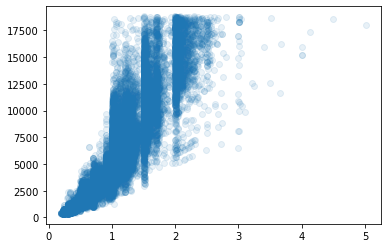

In [4]:
plt.scatter(data_new['carat'], data_new['price'], alpha=0.1)
pass

In [5]:
data_new['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      402.00
0.010      429.00
0.050      544.00
0.100      646.00
0.500     2401.00
0.900     9821.00
0.950    13107.10
0.990    17378.22
0.995    18093.66
Name: price, dtype: float64

In [6]:
data_new['carat'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.23
0.010    0.24
0.050    0.30
0.100    0.31
0.500    0.70
0.900    1.51
0.950    1.70
0.990    2.18
0.995    2.31
Name: carat, dtype: float64

In [7]:
rows_to_drop = data_new[
    (data_new['price'] < data_new['price'].quantile(0.005)) | (data_new['price'] > data_new['price'].quantile(0.995)) | 
    (data_new['carat']  < data_new['carat' ].quantile(0.005)) | (data_new['carat']  > data_new['carat' ].quantile(0.995))].index
data = data_new.drop(rows_to_drop)
data.shape

(53184, 10)

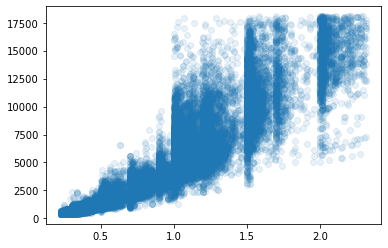

In [8]:
plt.scatter(data['carat'], data['price'], alpha=0.1)
pass

 2.2 Визуализация и описательная статистика

In [9]:
data.describe()

,carat,depth,table,price,x,y,z
count,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000
mean,0.786504,61.748451,57.451384,3830.148466,5.713838,5.717375,3.528204
std,0.451083,1.427690,2.231588,3802.382623,1.092347,1.114457,0.687762
min,0.230000,43.000000,43.000000,402.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000
max,2.310000,79.000000,95.000000,18077.000000,8.800000,58.900000,31.800000


Проанализировав строку count можно убедиться, что в наших данных нет пропусков.

In [10]:
data_describe = data.describe(include=['category'])
data_describe

,cut,color,clarity
count,53184,53184,53184
unique,5,7,8
top,Ideal,G,SI1
freq,21336,11177,12893


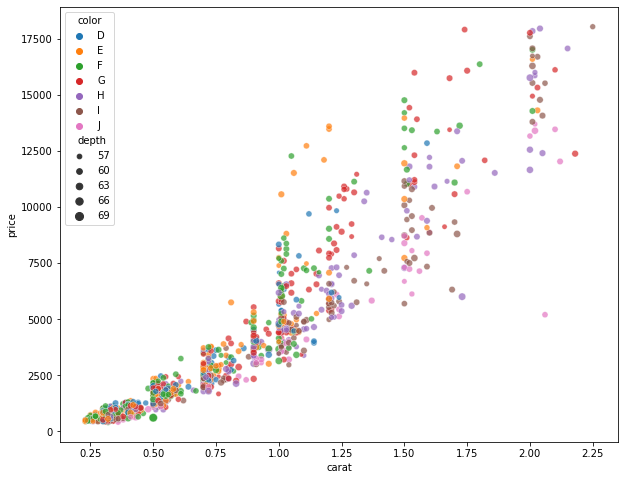

In [11]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.figure(figsize = (10, 8))
sns.scatterplot(x='carat', y='price', size='depth', hue='color', data=data.iloc[random_subset], alpha=0.7)
pass

Мы видим, что цена зависит примерно одинакого от каждого из принзнака, но ожидаемае возрастание цены от возрастания карата наблюдается. Так же цвет достаточно сильнее влияет на цену, чем размер алмаза, так наблюдается большой алмаз плохого цвета стоит дешевле алмазов меньшим размером, но более качественного цвета(относительного одинакового значения карат).

Построим все возможные диаграммы рассеивания для каждой пары переменных:

No handles with labels found to put in legend.


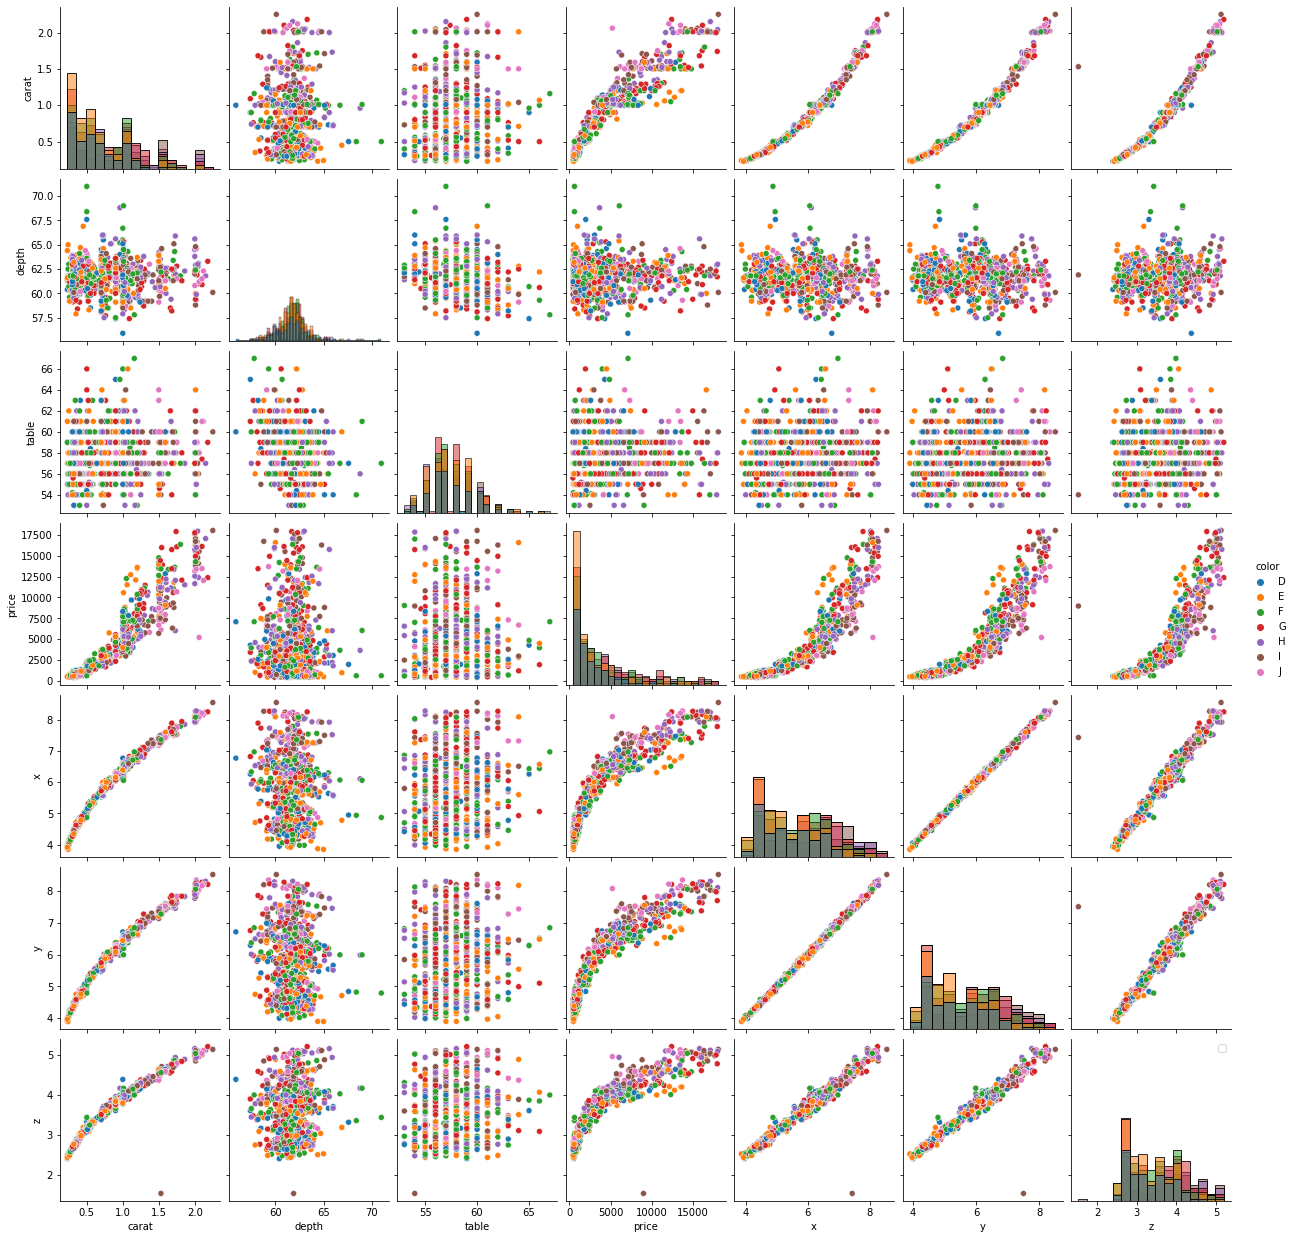

In [12]:
sns.pairplot(data.iloc[random_subset], hue='color', diag_kind='hist')
plt.legend()
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [13]:
corr_mat = data.corr()
corr_mat

,carat,depth,table,price,x,y,z
carat,1.000000,0.025708,0.186148,0.921690,0.977600,0.952838,0.955494
depth,0.025708,1.000000,-0.294586,-0.011206,-0.027578,-0.031530,0.095194
table,0.186148,-0.294586,1.000000,0.128906,0.198465,0.186267,0.152947
price,0.921690,-0.011206,0.128906,1.000000,0.882608,0.862390,0.859634
x,0.977600,-0.027578,0.198465,0.882608,1.000000,0.973053,0.970138
y,0.952838,-0.031530,0.186267,0.862390,0.973053,1.000000,0.950168
z,0.955494,0.095194,0.152947,0.859634,0.970138,0.950168,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

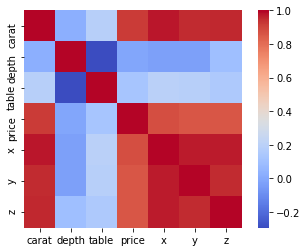

In [14]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Можно отметить очевидную зависимость между глубиной, высотой и шириной, а так же между ценой, каратами и всеми тремя 
измерениями. Наихудший эффект так же ожидаем, ведь чем больше глубина алмаза, тем меньше будет размер его большей части.

3. Векторизация

Нужно что-то сделать с категориальными (номинальными) признаками

In [15]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cut', 'color', 'clarity']


In [16]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


4.Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [17]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,carat,depth,table,price,x,y,z
count,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000
mean,0.786504,61.748451,57.451384,3830.148466,5.713838,5.717375,3.528204
std,0.451083,1.427690,2.231588,3802.382623,1.092347,1.114457,0.687762
min,0.230000,43.000000,43.000000,402.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000
max,2.310000,79.000000,95.000000,18077.000000,8.800000,58.900000,31.800000


In [18]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,carat,depth,table,price,x,y,z
count,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04
mean,3.962231e-14,4.968372e-13,-2.375612e-14,-1.281307e-15,8.863249e-14,2.172322e-13,-2.143969e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.233708e+00,-1.313202e+01,-6.475829e+00,-9.015790e-01,-5.230790e+00,-5.130189e+00,-5.129982e+00
25%,-8.568366e-01,-5.242390e-01,-6.503816e-01,-7.561439e-01,-9.098186e-01,-8.859698e-01,-8.988644e-01
50%,-1.917698e-01,3.610682e-02,-2.022702e-01,-3.784860e-01,-2.182239e-02,-1.559069e-02,-1.192906e-02
75%,5.619725e-01,5.264094e-01,6.939525e-01,3.710441e-01,7.471640e-01,7.201937e-01,7.296070e-01
max,3.377422e+00,1.208354e+01,1.682596e+01,3.746822e+00,2.825258e+00,4.772066e+01,4.110697e+01


Соединяем все в одну таблицу

In [19]:
data_normal = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data_normal.shape)

(53184, 27)


In [20]:
data_normal.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,5.318400e+04,53184.000000,53184.000000,53184.000000,...,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000,53184.000000
mean,3.962231e-14,4.968372e-13,-2.375612e-14,-1.281307e-15,8.863249e-14,2.172322e-13,-2.143969e-13,0.029501,0.090610,0.401173,...,0.099297,0.049959,0.013049,0.033412,0.242423,0.168002,0.151925,0.227662,0.068573,0.094953
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.169209,0.287056,0.490141,...,0.299063,0.217862,0.113486,0.179712,0.428553,0.373871,0.358952,0.419328,0.252729,0.293153
min,-1.233708e+00,-1.313202e+01,-6.475829e+00,-9.015790e-01,-5.230790e+00,-5.130189e+00,-5.129982e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.568366e-01,-5.242390e-01,-6.503816e-01,-7.561439e-01,-9.098186e-01,-8.859698e-01,-8.988644e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.917698e-01,3.610682e-02,-2.022702e-01,-3.784860e-01,-2.182239e-02,-1.559069e-02,-1.192906e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.619725e-01,5.264094e-01,6.939525e-01,3.710441e-01,7.471640e-01,7.201937e-01,7.296070e-01,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.377422e+00,1.208354e+01,1.682596e+01,3.746822e+00,2.825258e+00,4.772066e+01,4.110697e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


4. Разбитие данных на обучающую и тестовую выборки 

In [21]:
X = data_normal.drop('cut_Ideal', axis = 1) # выбрасываем столбец 'cut_Ideal'
y = data['cut']
feature_names = X.columns
feature_names

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [22]:
X = X.to_numpy()

In [23]:
Y = np.array(y == "Ideal"  , dtype='int')
Y

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
print(X.shape)
print(Y.shape)
N, d = X.shape

(53184, 26)
(53184,)


In [25]:
type(Y)

numpy.ndarray

In [26]:
type(X)

numpy.ndarray

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

37228 15956


5. $k$NN - классификатор ближайших соседей

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
number = [10,20,30]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': number}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.021918926786926418 10


In [35]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train  != y_train_predict)

In [36]:
print(err_test, err_train)

0.016670844823263975 0.015364779198452777


In [37]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[9334  172]
 [  94 6356]]



Вывод

Как итог выполненной лабораторной рабоыт была решена задача классификации. Был предсказан уровень резки алмаза с малой ошибкой, посредством алгоритма ближайших соседей (KNN). Минимальное значение ошибки при использовании параметра количества соседей равного 10. Также стоит отметить, что ошибка на тестовой выборке больше, чем на обучающей.